# Reinforcement Learning Project

## Environment - Lunar Lander

**Action Space**

There are four discrete actions available: 
- 0: do nothing
- 1: fire left orientation engine
- 2: fire main engine
- 3: fire right orientation engine

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. __Solved is 200 points__.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

- The lander crashes (the lander body gets in contact with the moon);

- The lander gets outside of the viewport (x coordinate is greater than 1);

- The lander is not awake.

**Version**
- V3

[More Information Here](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

## Libraries

In [1]:
import gymnasium as gym
import numpy as np
from typing import Callable, List, Optional
import matplotlib.pyplot as plt
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.evaluation import evaluate_policy

from utils import *

## Environment

In [2]:
env = gym.make("LunarLander-v3")#, render_mode="human") 

/Users/antoniooliveira/Documents/GitHub/RL_project/venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


## Solving the Environment

### Random Agent

[LOG] Episode 1 - Reward: -346.76
[LOG] Episode 2 - Reward: -332.07
[LOG] Episode 3 - Reward: -151.43
[LOG] Episode 4 - Reward: -151.74
[LOG] Episode 5 - Reward: -277.10
[LOG] Episode 6 - Reward: -65.79
[LOG] Episode 7 - Reward: -85.64
[LOG] Episode 8 - Reward: -284.32
[LOG] Episode 9 - Reward: -90.53
[LOG] Episode 10 - Reward: -130.93
[LOG] Episode 11 - Reward: -80.21
[LOG] Episode 12 - Reward: -102.77
[LOG] Episode 13 - Reward: -99.97
[LOG] Episode 14 - Reward: -281.64
[LOG] Episode 15 - Reward: -214.96
[LOG] Episode 16 - Reward: -109.88
[LOG] Episode 17 - Reward: -118.57
[LOG] Episode 18 - Reward: -103.75
[LOG] Episode 19 - Reward: -127.25
[LOG] Episode 20 - Reward: -119.07
[LOG] Episode 21 - Reward: -229.38
[LOG] Episode 22 - Reward: -196.36
[LOG] Episode 23 - Reward: -425.50
[LOG] Episode 24 - Reward: -58.32
[LOG] Episode 25 - Reward: -98.66
[LOG] Episode 26 - Reward: 17.41
[LOG] Episode 27 - Reward: 36.82
[LOG] Episode 28 - Reward: -379.85
[LOG] Episode 29 - Reward: -258.01
[LOG]

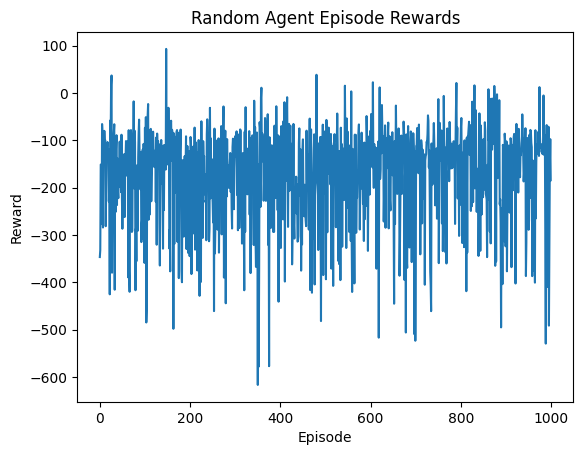

In [6]:
# render --> se quisermos ver a cena a funcionar
rewards_ra = run_agent(episodes=1000, seed=42, log_fn=my_logger, render=False)

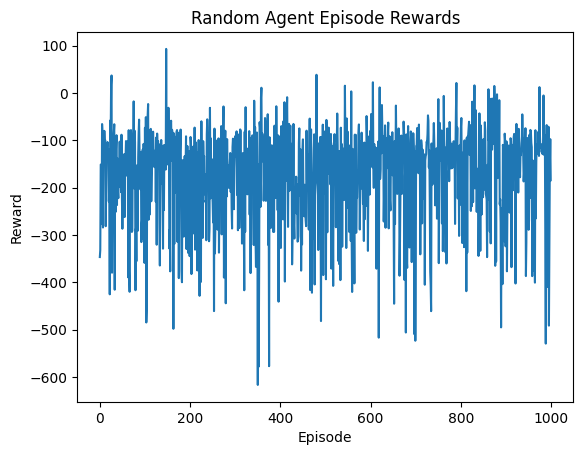

In [9]:
plt.plot(rewards_ra)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Rule-Based Agent

In [10]:
rewards_rb = run_agent(episodes=1000, render=False, seed=1,
                    log_fn = None,
                    agent_fn=rule_based_action)

Episode 1 - Total Reward: -627.54
Episode 2 - Total Reward: -484.33
Episode 3 - Total Reward: -538.49
Episode 4 - Total Reward: -604.53
Episode 5 - Total Reward: -617.20
Episode 6 - Total Reward: -618.19
Episode 7 - Total Reward: -556.49
Episode 8 - Total Reward: -246.63
Episode 9 - Total Reward: -545.36
Episode 10 - Total Reward: -514.74
Episode 11 - Total Reward: -505.03
Episode 12 - Total Reward: -472.07
Episode 13 - Total Reward: -250.46
Episode 14 - Total Reward: -577.35
Episode 15 - Total Reward: -582.02
Episode 16 - Total Reward: -611.03
Episode 17 - Total Reward: -553.99
Episode 18 - Total Reward: -496.96
Episode 19 - Total Reward: -584.85
Episode 20 - Total Reward: -122.91
Episode 21 - Total Reward: -614.18
Episode 22 - Total Reward: -578.23
Episode 23 - Total Reward: -608.36
Episode 24 - Total Reward: -496.53
Episode 25 - Total Reward: -585.02
Episode 26 - Total Reward: -549.85
Episode 27 - Total Reward: -573.30
Episode 28 - Total Reward: -614.23
Episode 29 - Total Reward: -4

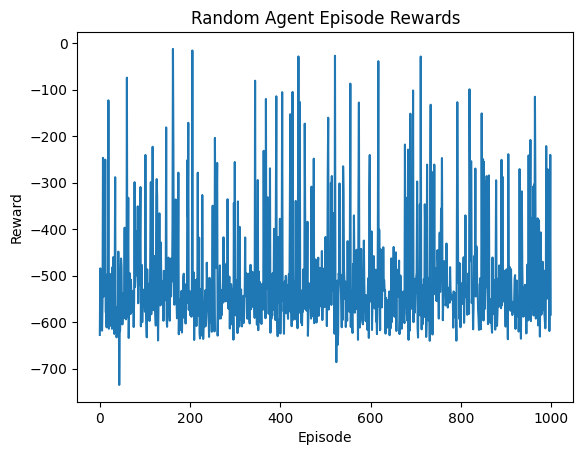

In [11]:
plt.plot(rewards_rb)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### DQN

In [18]:
model = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,         
    buffer_size=10000,          
    batch_size=128,             
    gamma=0.99,                 
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01,
    exploration_fraction=0.5,   
    target_update_interval=500, 
    train_freq=1,
    verbose=1,
    seed=42
)

timestamps = 300_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.5     |
|    ep_rew_mean      | -180     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 538      |
|    time_elapsed     | 0        |
|    total_timesteps  | 382      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.9      |
|    n_updates        | 281      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | -201     |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 470      |
|    time_elapsed     | 1        |
|    total_timesteps  | 806      |
| train/              |        

In [19]:
episodes = 100

rewards_dqn = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = 107.81
Episode 2: Reward = 128.10
Episode 3: Reward = 156.51
Episode 4: Reward = -29.57
Episode 5: Reward = -54.88
Episode 6: Reward = -57.14
Episode 7: Reward = 227.10
Episode 8: Reward = -128.49
Episode 9: Reward = -2.33
Episode 10: Reward = 259.89
Episode 11: Reward = 270.34
Episode 12: Reward = 242.23
Episode 13: Reward = 167.13
Episode 14: Reward = 211.26
Episode 15: Reward = 169.50
Episode 16: Reward = 137.25
Episode 17: Reward = -64.57
Episode 18: Reward = 174.49
Episode 19: Reward = -14.49
Episode 20: Reward = 134.27
Episode 21: Reward = 250.56
Episode 22: Reward = -88.82
Episode 23: Reward = 203.69
Episode 24: Reward = 154.05
Episode 25: Reward = 140.11
Episode 26: Reward = 182.12
Episode 27: Reward = -39.12
Episode 28: Reward = 112.08
Episode 29: Reward = -76.88
Episode 30: Reward = 179.77
Episode 31: Reward = -97.92
Episode 32: Reward = 155.29
Episode 33: Reward = 109.94
Episode 34: Reward = 196.63
Episode 35: Reward = -77.49
Episode 36: Reward = 272.92
E

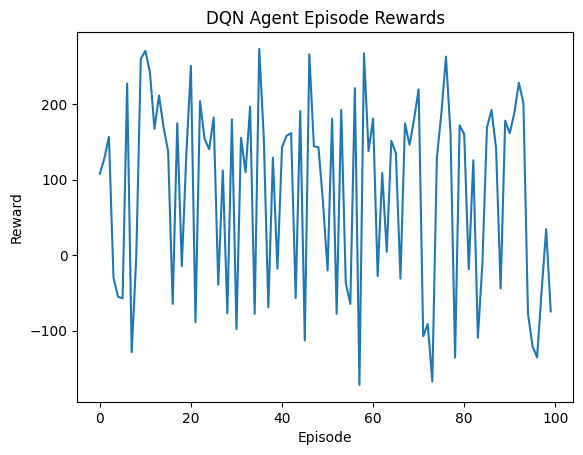

In [20]:
plt.plot(rewards_dqn)
plt.title("DQN Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

In [6]:
#model.save(f"./models/lunar_lander/dqn_{timestamps}_after_{episodes}")
#loaded_model = DQN.load("./models/lunar_lander/dqn_{timestamps}_after_{episodes}", env=env)


In [8]:
loaded_model = DQN.load(f"./models/lunar_lander/dqn_{timestamps}_after_{episodes}", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [13]:
#loaded_model.__dict__

In [21]:
episodes = 100

mean_reward, std_reward = evaluate_policy(
    model,
    env,
    n_eval_episodes=episodes,
    deterministic=True,
    render=False
)

print(f"Mean reward over {episodes} episodes: {mean_reward:.2f} ± {std_reward:.2f}")

Mean reward over 100 episodes: 92.54 ± 127.10


### A2C

In [4]:
model = A2C(
    policy="MlpPolicy",
    env=env,
    learning_rate=7e-4,
    n_steps=5,
    gamma=0.99,
    gae_lambda=1.0,
    ent_coef=0.01,
    vf_coef=0.5,
    max_grad_norm=0.5,
    use_rms_prop=True,
    rms_prop_eps=1e-5,
    normalize_advantage=False,
    verbose=1,
    seed=42,
)

timestamps = 500_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 111      |
|    ep_rew_mean        | -202     |
| time/                 |          |
|    fps                | 674      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.21    |
|    explained_variance | -0.0309  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -8.08    |
|    value_loss         | 51.2     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 107      |
|    ep_rew_mean        | -271     |
| time/                 |          |
|    fps                | 685      |
|    iterations         | 200      |
|    time_elapsed 

In [5]:
episodes = 1000

rewards_a2c = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = 195.18
Episode 2: Reward = -57.99
Episode 3: Reward = -98.70
Episode 4: Reward = 215.16
Episode 5: Reward = 205.26
Episode 6: Reward = -65.04
Episode 7: Reward = 135.64
Episode 8: Reward = -29.03
Episode 9: Reward = -139.99
Episode 10: Reward = 191.45
Episode 11: Reward = 215.08
Episode 12: Reward = 154.81
Episode 13: Reward = -83.81
Episode 14: Reward = 129.50
Episode 15: Reward = -42.49
Episode 16: Reward = -86.44
Episode 17: Reward = 160.43
Episode 18: Reward = -83.68
Episode 19: Reward = -99.59
Episode 20: Reward = -65.44
Episode 21: Reward = -65.34
Episode 22: Reward = 202.14
Episode 23: Reward = 193.10
Episode 24: Reward = -39.56
Episode 25: Reward = -155.61
Episode 26: Reward = -131.14
Episode 27: Reward = 176.46
Episode 28: Reward = -63.88
Episode 29: Reward = -52.73
Episode 30: Reward = 209.63
Episode 31: Reward = -49.87
Episode 32: Reward = -134.42
Episode 33: Reward = -56.53
Episode 34: Reward = 176.07
Episode 35: Reward = -89.18
Episode 36: Reward = 86.8

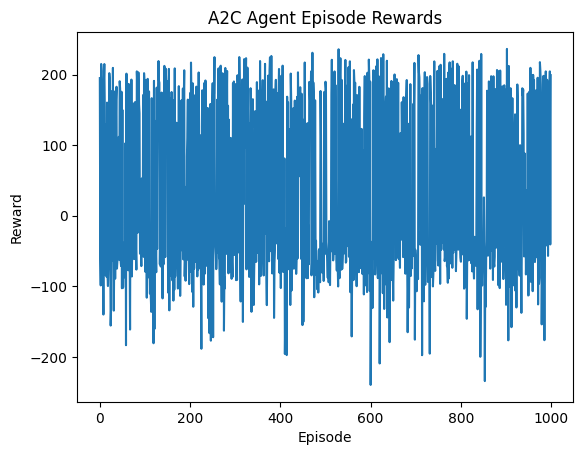

In [6]:
plt.plot(rewards_a2c)
plt.title("A2C Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

In [7]:
#model.save(f"./models/lunar_lander/a2c_{timestamps}_after_{episodes}")

In [8]:
#model = A2C.load("models/lunar_lander/a2c_500000_after_1000.zip", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### PPO

In [20]:
model = PPO("MlpPolicy", env, verbose=1, seed=42)

timestamps = 100_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94.8     |
|    ep_rew_mean     | -190     |
| time/              |          |
|    fps             | 2080     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95          |
|    ep_rew_mean          | -168        |
| time/                   |             |
|    fps                  | 1465        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004195164 |
|    clip_fraction        | 0.00732     |
|    clip_range           | 0.2         |
|    entropy_loss   

In [21]:
episodes = 1000

rewards_ppo = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -90.54
Episode 2: Reward = -152.69
Episode 3: Reward = -121.50
Episode 4: Reward = -138.88
Episode 5: Reward = -125.91
Episode 6: Reward = -125.53
Episode 7: Reward = -135.21
Episode 8: Reward = -105.28
Episode 9: Reward = -87.78
Episode 10: Reward = -72.22
Episode 11: Reward = -44.05
Episode 12: Reward = -89.42
Episode 13: Reward = -98.04
Episode 14: Reward = -73.74
Episode 15: Reward = -111.88
Episode 16: Reward = -96.08
Episode 17: Reward = -86.79
Episode 18: Reward = -126.54
Episode 19: Reward = -100.25
Episode 20: Reward = -129.94
Episode 21: Reward = -81.09
Episode 22: Reward = -97.12
Episode 23: Reward = -62.90
Episode 24: Reward = -82.94
Episode 25: Reward = -116.55
Episode 26: Reward = -104.31
Episode 27: Reward = -146.09
Episode 28: Reward = -69.07
Episode 29: Reward = -100.66
Episode 30: Reward = -116.76
Episode 31: Reward = -91.56
Episode 32: Reward = -136.51
Episode 33: Reward = -89.36
Episode 34: Reward = -69.29
Episode 35: Reward = -120.73
Episode 36:

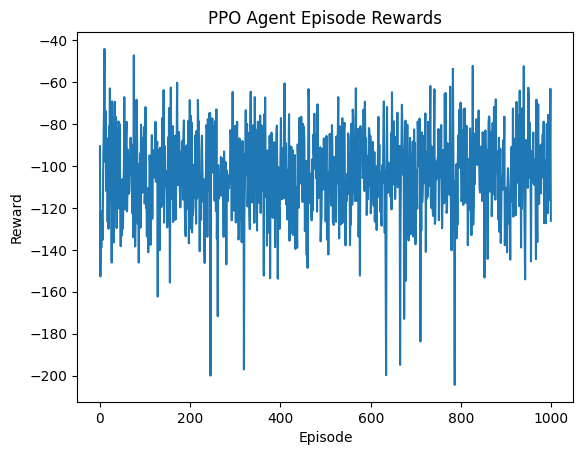

In [22]:
plt.plot(rewards_ppo)
plt.title("PPO Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Using Torch - Q-Network

In [ ]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

In [4]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Hyperparameters

EPISODES = 1000
GAMMA = 0.99
EPS_START = 1.0
EPS_END = 0.01
EPS_DECAY = 0.995

In [7]:
# number of input features
obs_dim = env.observation_space.shape[0]

# number of outputs from the Q-network
act_dim = env.action_space.n

In [8]:
model = QNet(obs_dim, act_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epsilon = EPS_START

In [9]:
model_torch_dqn, rewards_torch_dqn = train_dqn(
    model=model,
    env=env,
    optimizer=optimizer,
    device=device,
    episodes=EPISODES,
    gamma=GAMMA,
    epsilon_start=EPS_START,
    epsilon_end=EPS_END,
    epsilon_decay=EPS_DECAY
)


Episode 0: Reward = -228.1, Epsilon = 0.995
Episode 1: Reward = -73.5, Epsilon = 0.990
Episode 2: Reward = -306.8, Epsilon = 0.985
Episode 3: Reward = -42.4, Epsilon = 0.980
Episode 4: Reward = -106.3, Epsilon = 0.975
Episode 5: Reward = -175.5, Epsilon = 0.970
Episode 6: Reward = -355.2, Epsilon = 0.966
Episode 7: Reward = -38.5, Epsilon = 0.961
Episode 8: Reward = -133.4, Epsilon = 0.956
Episode 9: Reward = -308.5, Epsilon = 0.951
Episode 10: Reward = -260.3, Epsilon = 0.946
Episode 11: Reward = -384.7, Epsilon = 0.942
Episode 12: Reward = -62.1, Epsilon = 0.937
Episode 13: Reward = -98.3, Epsilon = 0.932
Episode 14: Reward = -125.8, Epsilon = 0.928
Episode 15: Reward = -283.2, Epsilon = 0.923
Episode 16: Reward = -315.4, Epsilon = 0.918
Episode 17: Reward = -181.6, Epsilon = 0.914
Episode 18: Reward = -99.0, Epsilon = 0.909
Episode 19: Reward = -303.1, Epsilon = 0.905
Episode 20: Reward = -104.8, Epsilon = 0.900
Episode 21: Reward = -86.5, Epsilon = 0.896
Episode 22: Reward = -218.5

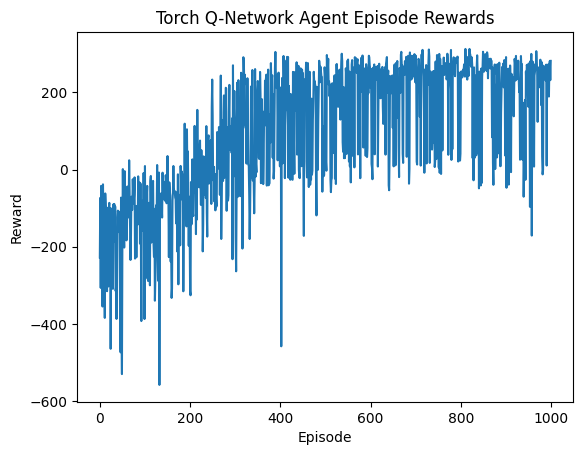

In [10]:
plt.plot(rewards_torch_dqn)
plt.title("Torch DQN Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

In [13]:
torch.save(model.state_dict(), f"./models/lunar_lander/q_net_{EPISODES}.pth")

In [24]:
# Recreate the model architecture first
# model = QNet(obs_dim, act_dim).to(device)

# Load 
# model.load_state_dict(torch.load("./models/lunar_lander/q_net.pth", map_location=device))


Model loaded and ready!


In [11]:
def evaluate_model(model, env, n_episodes=100, render=False):
    rewards = []
    for episode in range(n_episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            if render:
                env.render()
            # Use deterministic action (no exploration)
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
        rewards.append(total_reward)

    env.close()
    avg_reward = sum(rewards) / n_episodes
    std_reward = (sum((r - avg_reward) ** 2 for r in rewards) / n_episodes) ** 0.5

    return avg_reward, std_reward


In [12]:
avg, std = evaluate_model(model, env, n_episodes=100, render=False)
print(f"Average reward over 100 episodes: {avg:.2f} ± {std:.2f}")


Average reward over 100 episodes: 248.31 ± 45.30


### Performance Comparison

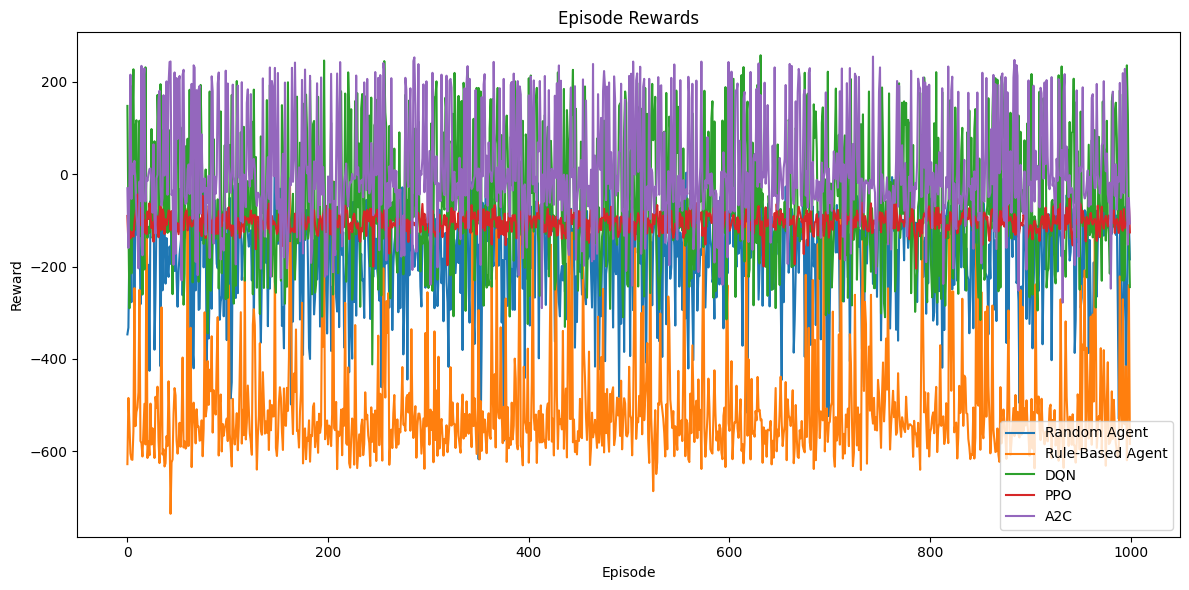

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(rewards_ra, label='Random Agent')
plt.plot(rewards_rb, label='Rule-Based Agent')
plt.plot(rewards_dqn, label="DQN")
plt.plot(rewards_ppo, label="PPO")
plt.plot(rewards_a2c, label="A2C")
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.tight_layout()
plt.show()


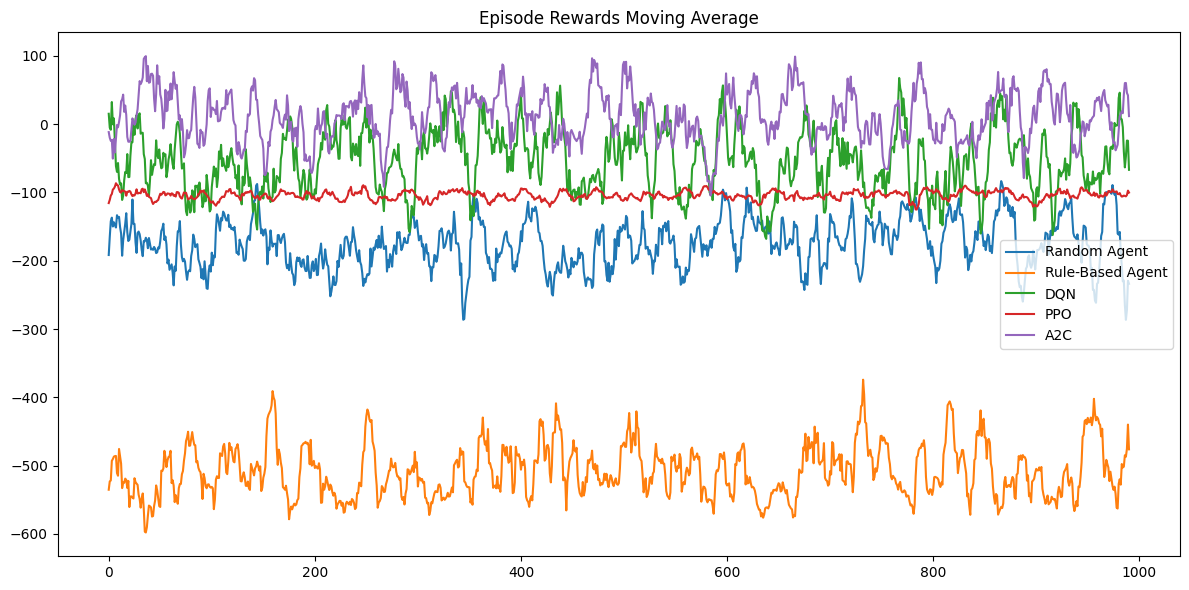

In [32]:
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot smoothed rewards
plt.figure(figsize=(12, 6))
plt.title("Episode Rewards Moving Average")
plt.plot(moving_average(rewards_ra), label='Random Agent')
plt.plot(moving_average(rewards_rb), label='Rule-Based Agent')
plt.plot(moving_average(rewards_dqn), label="DQN")
plt.plot(moving_average(rewards_ppo), label="PPO")
plt.plot(moving_average(rewards_a2c), label="A2C")
plt.legend()
plt.tight_layout()
plt.show()